In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


In [3]:
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix


In [4]:
# Load the dataset
data = pd.read_csv("Dentistry Dataset.csv")


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [6]:
print(data.head())


   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

In [7]:
# Check for missing values
print(data.isnull().sum())

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [ ]:
# For missing values, you can choose to drop or impute. Example of imputation with mean:
data.fillna(data.mean(), inplace=True)

In [9]:
data.describe()


Sl No  Sample ID          Age  inter canine distance intraoral  \
count  1100.000000        0.0  1100.000000                      1100.000000   
mean    550.500000        NaN    21.625455                        25.989009   
std     317.686953        NaN     2.085892                         1.315292   
min       1.000000        NaN    18.000000                        23.120000   
25%     275.750000        NaN    20.000000                        25.000000   
50%     550.500000        NaN    22.000000                        25.900000   
75%     825.250000        NaN    23.000000                        26.992500   
max    1100.000000        NaN    25.000000                        30.310000   

       intercanine distance casts  right canine width intraoral  \
count                 1100.000000                   1100.000000   
mean                    25.880082                      6.563000   
std                      1.862323                      0.379035   
min                      6.540000                      5.460000   
25%                     24.980000                      6.290000   
50%                     25.900000                      6.520000   
75%                     27.000000                      6.802500   
max                     30.310000                      7.610000   

       right canine width casts  left canine width intraoral  \
count               1100.000000                  1100.000000   
mean                   6.564491                     6.669627   
std                    0.377553                     0.375841   
min                    5.460000                     5.460000   
25%                    6.300000                     6.400000   
50%                    6.520000                     6.660000   
75%                    6.802500                     6.910000   
max                    7.600000                     7.810000   

       left canine width casts  right canine index intra oral  \
count              1100.000000                    1100.000000   
mean                  6.675018                       0.253122   
std                   0.377098                       0.015344   
min                   5.460000                       0.223000   
25%                   6.407500                       0.242000   
50%                   6.680000                       0.253000   
75%                   6.920000                       0.262000   
max                   7.810000                       0.363000   

       right canine index casts  left canine index intraoral  \
count               1100.000000                  1100.000000   
mean                   0.252355                     0.256453   
std                    0.012892                     0.012355   
min                    0.223000                     0.223000   
25%                    0.242000                     0.247000   
50%                    0.253000                     0.255000   
75%                    0.261250                     0.264250   
max                    0.302000                     0.305000   

       left canine index casts  
count              1100.000000  
mean                  0.256361  
std                   0.012374  
min                   0.223000  
25%                   0.247000  
50%                   0.255000  
75%                   0.264000  
max                   0.304000

In [10]:
#encoding the data of Gender from categorical to numerical
twogender = {'Female':0, 'Male':1}
data['Gender'] = data['Gender'].map(twogender)


In [11]:
X = data.drop('Gender', axis=1)
y = data['Gender']


In [12]:
data.head()

Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24       0                            25.06   
1      2        NaN   22       0                            25.78   
2      3        NaN   23       0                            23.83   
3      4        NaN   20       0                            26.12   
4      5        NaN   20       0                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.96                         6.28   
3                      6.08                         6.56   
4                      6.09                         6.50   

   left canine width casts  right canine index intra oral  \
0                     6.10                          0.242   
1                     6.33                          0.237   
2                     6.28                          0.248   
3                     6.56                          0.232   
4                     6.50                          0.231   

   right canine index casts  left canine index intraoral  \
0                     0.242                        0.242   
1                     0.237                        0.247   
2                     0.248                        0.264   
3                     0.232                        0.250   
4                     0.231                        0.246   

   left canine index casts  
0                    0.241  
1                    0.247  
2                    0.264  
3                    0.250  
4                    0.246

In [13]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [14]:
X

Sl No  Sample ID  Age  inter canine distance intraoral  \
0         1        NaN   24                            25.06   
1         2        NaN   22                            25.78   
2         3        NaN   23                            23.83   
3         4        NaN   20                            26.12   
4         5        NaN   20                            26.36   
...     ...        ...  ...                              ...   
1095   1096        NaN   24                            24.29   
1096   1097        NaN   22                            25.22   
1097   1098        NaN   25                            24.24   
1098   1099        NaN   21                            24.87   
1099   1100        NaN   23                            24.51   

      intercanine distance casts  right canine width intraoral  \
0                          25.05                          6.08   
1                          25.79                          6.13   
2                          23.83                          5.91   
3                          26.12                          6.08   
4                          26.41                          6.09   
...                          ...                           ...   
1095                       24.29                          6.58   
1096                       25.22                          6.70   
1097                       24.24                          6.60   
1098                       24.87                          6.57   
1099                       24.51                          6.36   

      right canine width casts  left canine width intraoral  \
0                         6.08                         6.09   
1                         6.13                         6.33   
2                         5.96                         6.28   
3                         6.08                         6.56   
4                         6.09                         6.50   
...                        ...                          ...   
1095                      6.58                         6.60   
1096                      6.70                         6.80   
1097                      6.60                         6.61   
1098                      6.57                         6.66   
1099                      6.36                         6.78   

      left canine width casts  right canine index intra oral  \
0                        6.10                          0.242   
1                        6.33                          0.237   
2                        6.28                          0.248   
3                        6.56                          0.232   
4                        6.50                          0.231   
...                       ...                            ...   
1095                     6.60                          0.271   
1096                     6.80                          0.265   
1097                     6.61                          0.272   
1098                     6.66                          0.264   
1099                     6.78                          0.259   

      right canine index casts  left canine index intraoral  \
0                        0.242                        0.242   
1                        0.237                        0.247   
2                        0.248                        0.264   
3                        0.232                        0.250   
4                        0.231                        0.246   
...                        ...                          ...   
1095                     0.271                        0.272   
1096                     0.265                        0.269   
1097                     0.272                        0.272   
1098                     0.264                        0.267   
1099                     0.259                        0.276   

      left canine index casts  
0                       0.241  
1                       0.247  
2                       0.264  
3                       0.250  
4

In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1100, dtype: int64

In [16]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [71]:
scaler = Normalizer()
X_normalized = scaler.fit_transform(X)


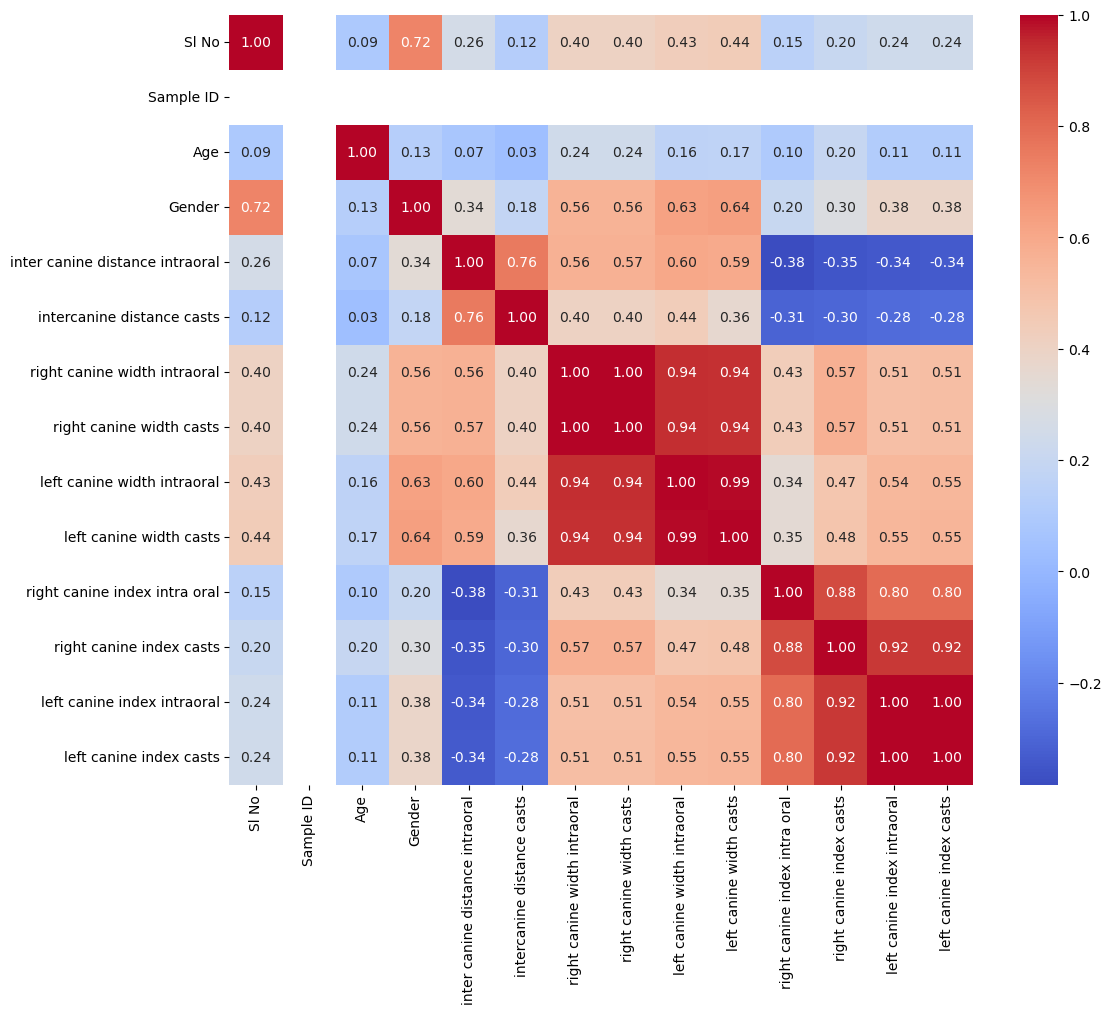

In [17]:
# Compute the correlation matrix
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


C:\Users\user\OneDrive\PRIYANKA NOTES\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


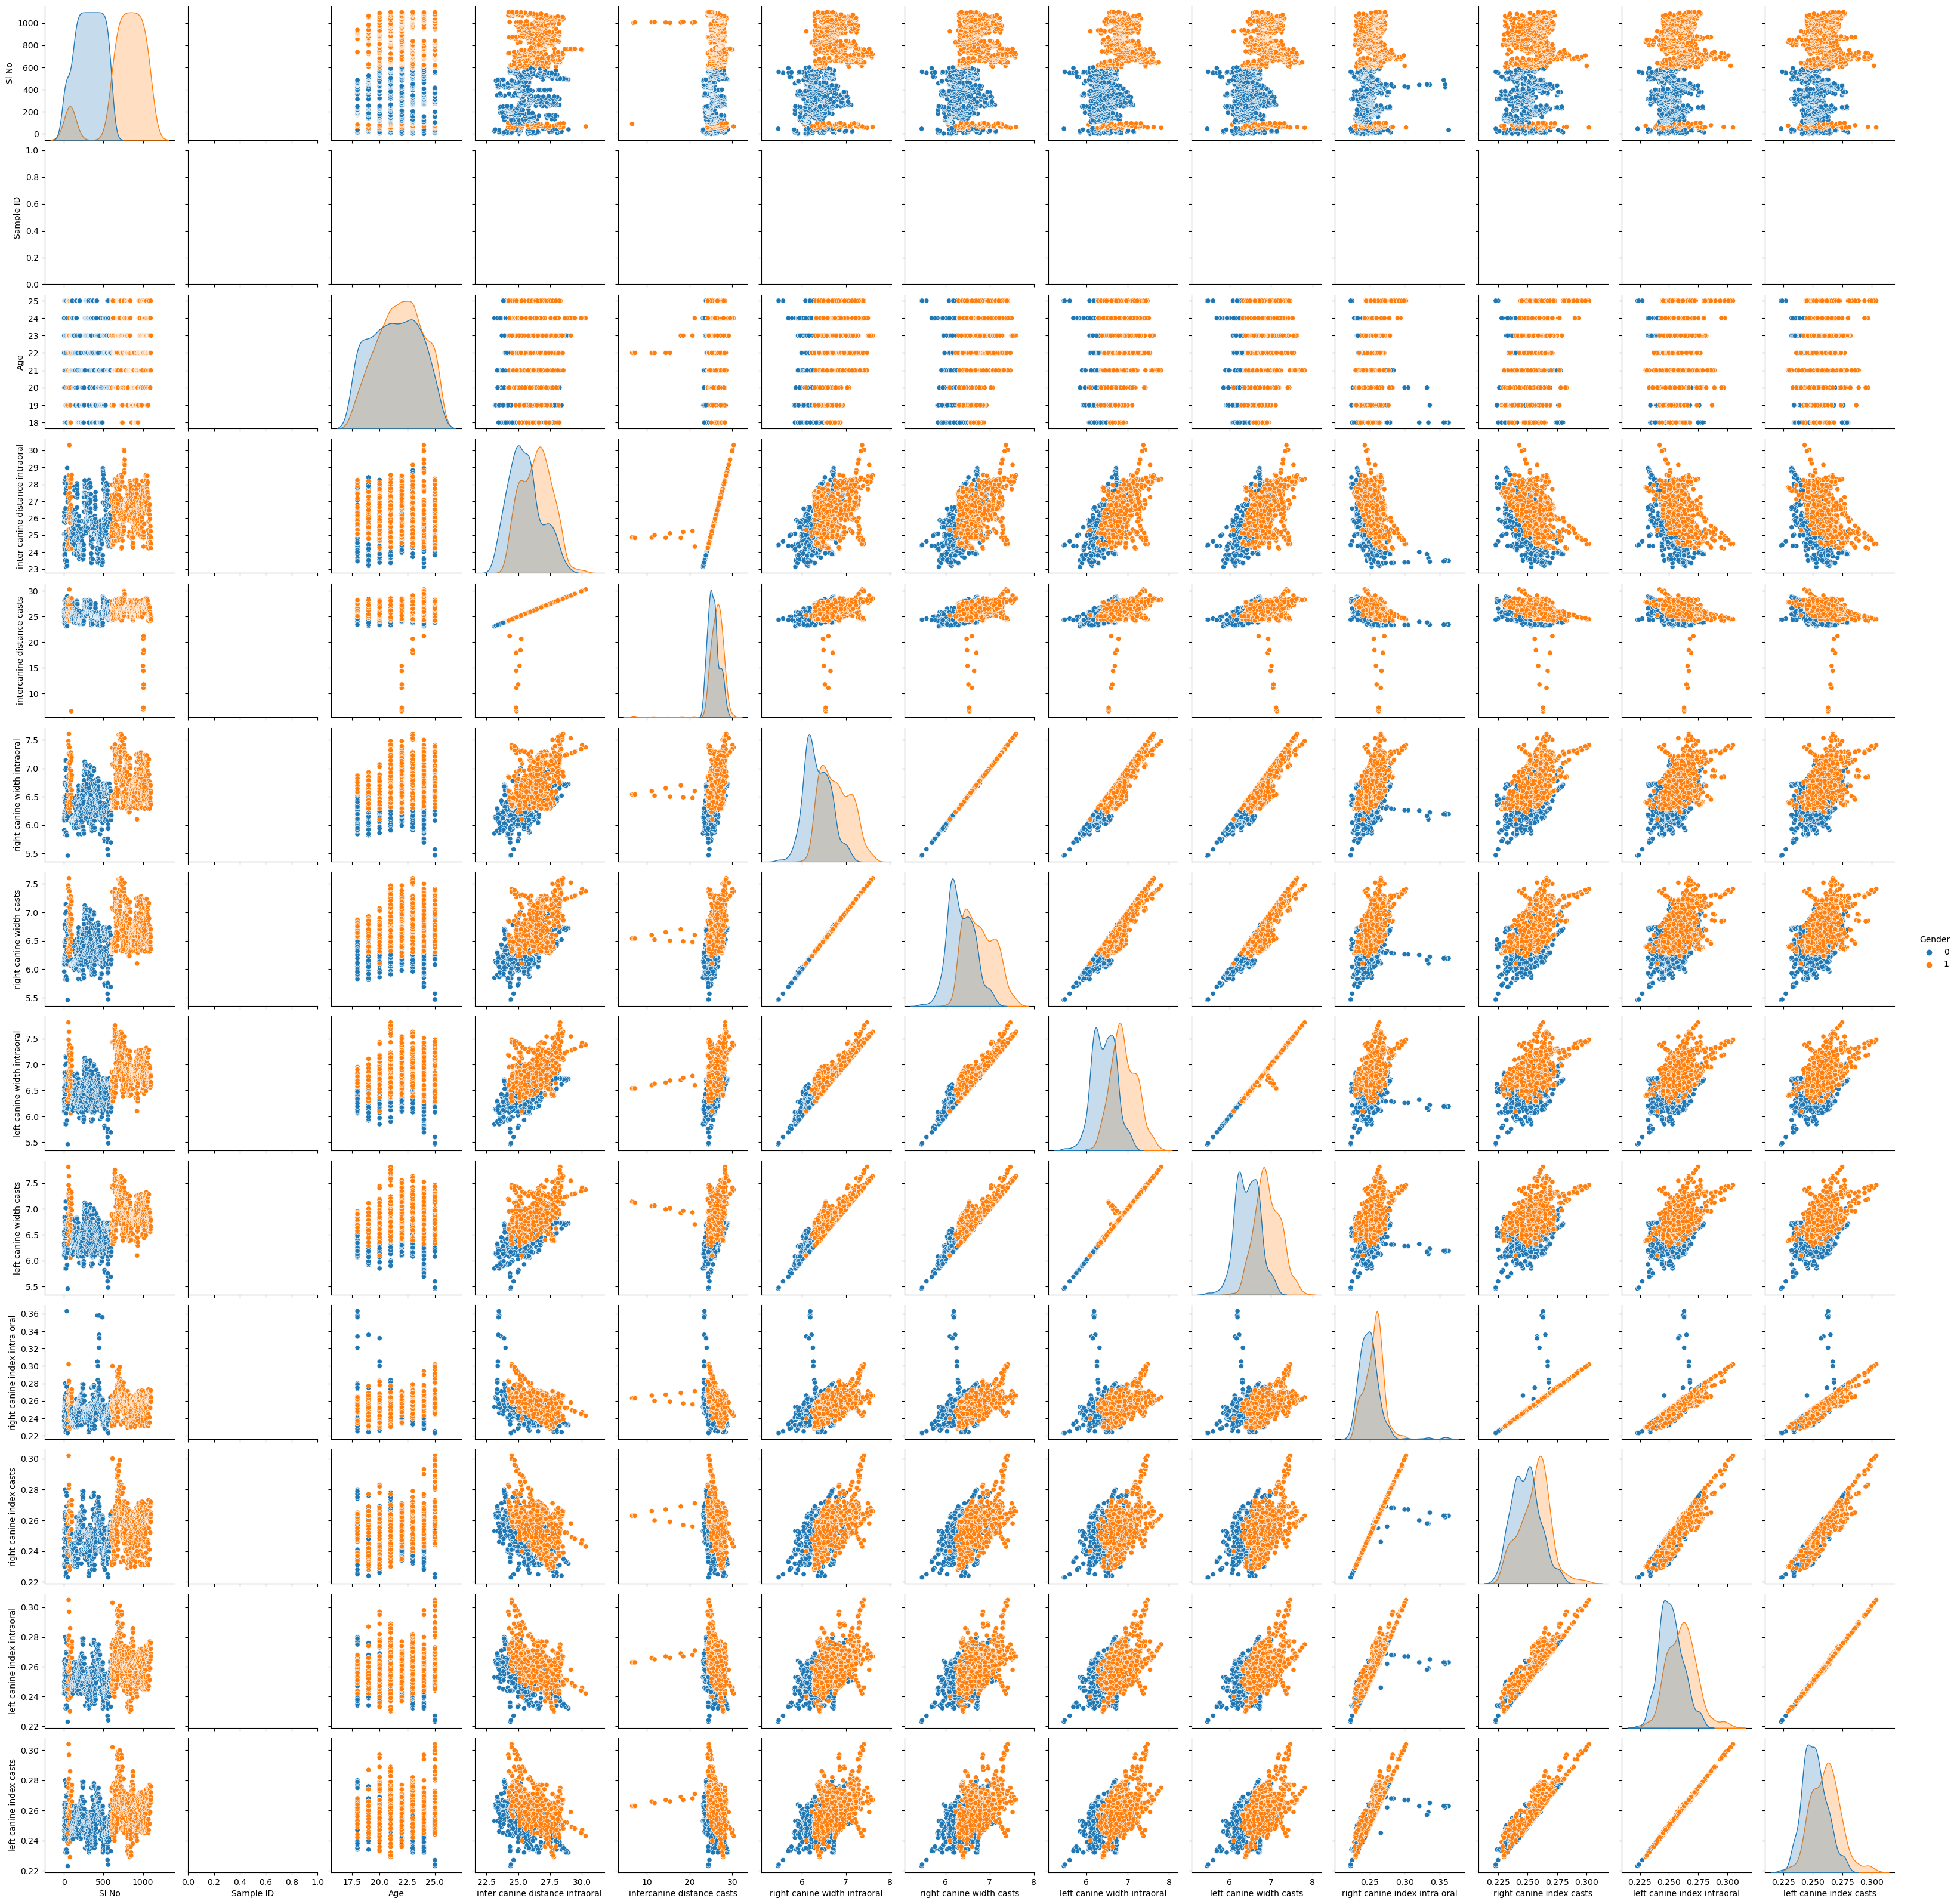

In [18]:
sns.pairplot(data, hue='Gender')
plt.show()


In [ ]:
# Example of dropping features
X = X.drop(['some_highly_correlated_feature'], axis=1)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)


In [81]:
X_train

array([[0.77242925, 0.33706004, 0.51963422, 0.14044168],
       [0.72366005, 0.32162669, 0.58582004, 0.17230001],
       [0.69804799, 0.338117  , 0.59988499, 0.196326  ],
       [0.76785726, 0.34902603, 0.51190484, 0.16287881],
       [0.69198788, 0.34599394, 0.58626751, 0.24027357],
       [0.73446047, 0.37367287, 0.5411814 , 0.16750853],
       [0.70953708, 0.28008043, 0.61617694, 0.1960563 ],
       [0.70631892, 0.37838513, 0.5675777 , 0.18919257],
       [0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.71486543, 0.25995106, 0.62202576, 0.18567933],
       [0.75676497, 0.35228714, 0.53495455, 0.13047672],
       [0.81609427, 0.5336001 , 0.21971769, 0.03138824],
       [0.80033301, 0.56023311, 0.20808658, 0.04801998],
       [0.76693897, 0.57144472, 0.28572236, 0.06015208],
       [0.76923077, 0.30769231, 0.53846154, 0.15384615],
       [0.73122464, 0.31338199, 0.56873028, 0.20892133],
       [0.776114  , 0.54974742, 0.30721179, 0.03233808],
       [0.82647451, 0.4958847 ,

In [82]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [83]:
X_test

array([[0.73659895, 0.33811099, 0.56754345, 0.14490471],
       [0.8068282 , 0.53788547, 0.24063297, 0.04246464],
       [0.70600618, 0.2383917 , 0.63265489, 0.21088496],
       [0.73350949, 0.35452959, 0.55013212, 0.18337737],
       [0.76467269, 0.31486523, 0.53976896, 0.15743261],
       [0.82225028, 0.51771314, 0.22840286, 0.06090743],
       [0.75911707, 0.3931142 , 0.48800383, 0.17622361],
       [0.73337886, 0.32948905, 0.54206264, 0.24445962],
       [0.76444238, 0.27125375, 0.55483721, 0.18494574],
       [0.76434981, 0.35581802, 0.51395936, 0.15814134],
       [0.71562645, 0.3523084 , 0.56149152, 0.22019275],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.82699754, 0.52627116, 0.19547215, 0.03007264],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.77964883, 0.58091482, 0.22930848, 0.0458617 ],
       [0.72634846, 0.38046824, 0.54187901, 0.18446945],
       [0.68619022, 0.31670318, 0.61229281, 0.232249  ],
       [0.76185188, 0.34011245,

In [84]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [59]:
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model_lr = LogisticRegression(max_iter=200)

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = model_lr.predict(X_test)

# Evaluate the model
accuracy = model_lr.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [89]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [91]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [92]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    return y_pred

In [90]:
print("Logistic Regression Evaluation")
evaluate_model(model_lr, X_test, y_test)


Logistic Regression Evaluation
Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.54      0.70        13
           2       0.68      1.00      0.81        13

    accuracy                           0.87        45
   macro avg       0.89      0.85      0.84        45
weighted avg       0.91      0.87      0.86        45



array([2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0])

In [96]:
print("Random Forest Evaluation")
evaluate_model(model_rf, X_test, y_test)


Random Forest Evaluation
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [97]:
print("Decision Tree Evaluation")
evaluate_model(model_dt, X_test, y_test)


Decision Tree Evaluation
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  4  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.75      0.92      0.83        13
           2       0.90      0.69      0.78        13

    accuracy                           0.89        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.90      0.89      0.89        45



array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [95]:
print("XGBoost Evaluation")
evaluate_model(model_xgb, X_test, y_test)


XGBoost Evaluation
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [50]:
def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

Decision Tree ROC Curve


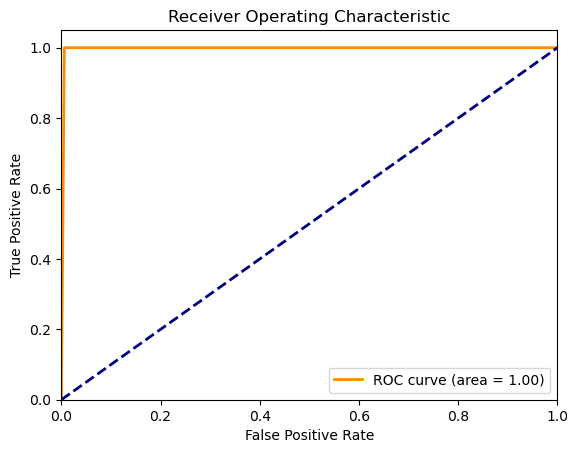

In [51]:
print("Decision Tree ROC Curve")
plot_roc_curve(model_dt, X_test, y_test)


XGBoost ROC Curve


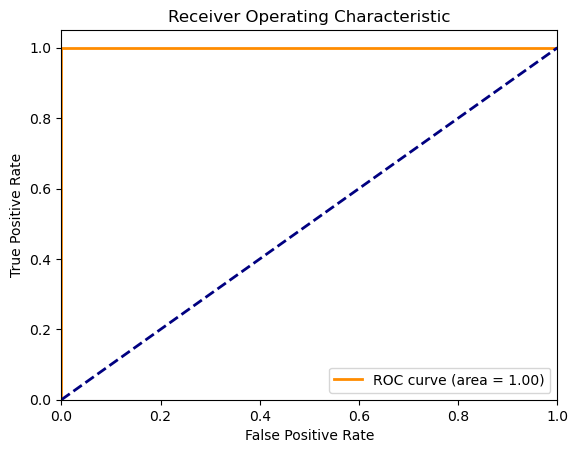

In [52]:
print("XGBoost ROC Curve")
plot_roc_curve(model_xgb, X_test, y_test)


Random Forest ROC Curve


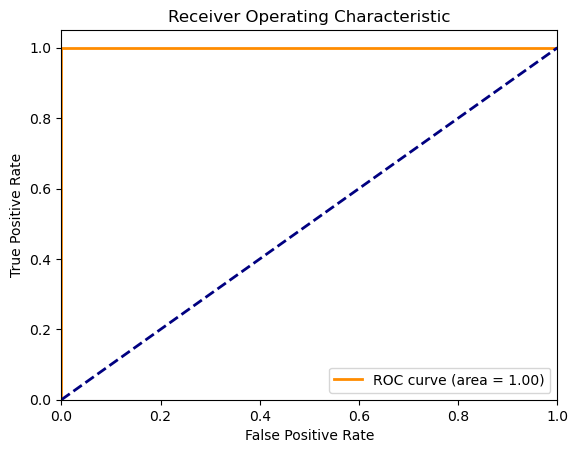

In [53]:
print("Random Forest ROC Curve")
plot_roc_curve(model_rf, X_test, y_test)


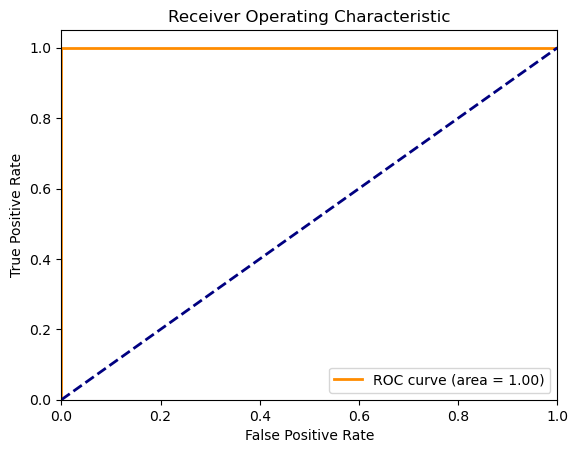

In [54]:
print("Logistic RegressionROC Curve")
plot_roc_curve(model_lr, X_test, y_test)
